In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel(r"C:\Users\Admin\Downloads\Data Set.xlsx") 



In [2]:
df.head()

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1
2,19067,61,Desktop,Kolkata,Microphone,784.924822,2,2022-12-10 10:25:27,20
3,19392,24,Desktop,Meerut,Action Camera,11000.476305,8,2023-02-24 16:24:13,8
4,57501,60,Desktop,Faridabad,Microphone,2814.737205,5,2021-09-15 02:45:31,10


In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CustomerID    100000 non-null  int64         
 1   Age           100000 non-null  int64         
 2   Device        100000 non-null  object        
 3   City          100000 non-null  object        
 4   Product       100000 non-null  object        
 5   Price         100000 non-null  float64       
 6   Quantity      100000 non-null  int64         
 7   PurchaseDate  100000 non-null  datetime64[ns]
 8   BrowsingTime  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 6.9+ MB


In [5]:
df.isnull().sum()

CustomerID      0
Age             0
Device          0
City            0
Product         0
Price           0
Quantity        0
PurchaseDate    0
BrowsingTime    0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [7]:


# Encode relevant categorical variables
label_encoders = {}
categorical_columns = ['Device', 'City', 'Product']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col + '_encoded'] = label_encoders[col].fit_transform(df[col])

# Scale the numerical variables
scaler = StandardScaler()
numerical_columns = ['Age', 'Price', 'Quantity', 'BrowsingTime']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [8]:
df.head()

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,Device_encoded,City_encoded,Product_encoded
0,9597,-0.134442,Mobile,Vadodara,Smart Thermostat,-0.351207,-1.221325,2021-08-06 05:29:38,-0.166199,1,46,36
1,11891,-1.180335,Tablet,Vadodara,Camera,0.992678,0.171081,2022-11-25 01:54:51,-1.485727,2,46,2
2,19067,1.107556,Desktop,Kolkata,Microphone,-0.510580,-1.221325,2022-12-10 10:25:27,1.648151,0,23,21
3,19392,-1.311072,Desktop,Meerut,Action Camera,-0.065320,0.867285,2023-02-24 16:24:13,-0.331140,0,27,0
4,57501,1.042187,Desktop,Faridabad,Microphone,-0.422108,-0.177020,2021-09-15 02:45:31,-0.001258,0,12,21


In [9]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'Price', 'Quantity', 'BrowsingTime', 'Device_encoded', 'City_encoded', 'Product_encoded']])
    wcss.append(kmeans.inertia_)


C:\Users\Admin\OneDrive\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\OneDrive\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\OneDrive\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\OneDrive\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

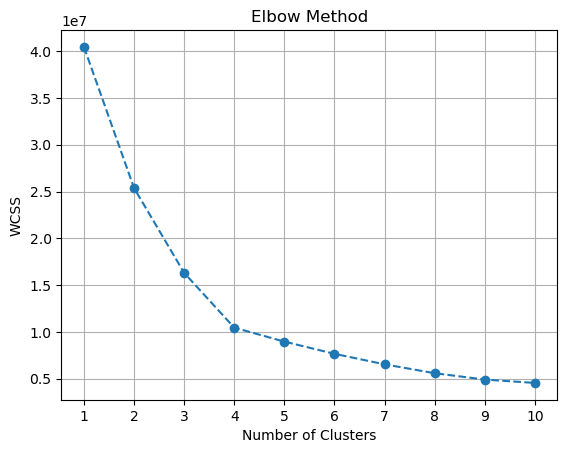

In [10]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [11]:
optimal_k = 4

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Price', 'Quantity', 'BrowsingTime', 'Device_encoded', 'City_encoded', 'Product_encoded']])


C:\Users\Admin\OneDrive\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
df.head()

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,Device_encoded,City_encoded,Product_encoded,Cluster
0,9597,-0.134442,Mobile,Vadodara,Smart Thermostat,-0.351207,-1.221325,2021-08-06 05:29:38,-0.166199,1,46,36,2
1,11891,-1.180335,Tablet,Vadodara,Camera,0.992678,0.171081,2022-11-25 01:54:51,-1.485727,2,46,2,0
2,19067,1.107556,Desktop,Kolkata,Microphone,-0.510580,-1.221325,2022-12-10 10:25:27,1.648151,0,23,21,3
3,19392,-1.311072,Desktop,Meerut,Action Camera,-0.065320,0.867285,2023-02-24 16:24:13,-0.331140,0,27,0,0
4,57501,1.042187,Desktop,Faridabad,Microphone,-0.422108,-0.177020,2021-09-15 02:45:31,-0.001258,0,12,21,3


In [13]:
df.to_csv('clustered_data.csv', index=False)

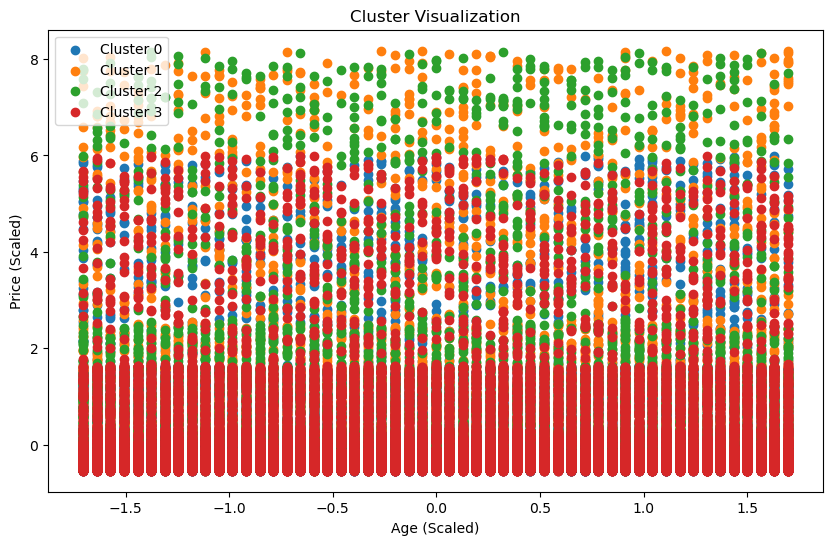

In [14]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_k):
    cluster_df = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_df['Age'], cluster_df['Price'], label=f'Cluster {cluster_label}')
plt.title('Cluster Visualization')
plt.xlabel('Age (Scaled)')
plt.ylabel('Price (Scaled)')
plt.legend()
plt.show()

In [10]:
# Compute the mean of numerical variables and mode of categorical variables for each cluster
cluster_characteristics = df.groupby('Cluster').agg({
    'Age': 'mean',  # or 'median' depending on preference
    'Price': 'mean',  # or 'median' depending on preference
    'Quantity': 'mean',  # or 'median' depending on preference
    'BrowsingTime': 'mean',  # or 'median' depending on preference
    'Device': lambda x: x.mode(),
    'City': lambda x: x.mode(),
    'Product': lambda x: x.mode()
}).reset_index()

# Print the characteristics of each cluster
for i, row in cluster_characteristics.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print(f"  Age: {row['Age']}")
    print(f"  Price: {row['Price']}")
    print(f"  Quantity: {row['Quantity']}")
    print(f"  BrowsingTime: {row['BrowsingTime']}")
    print(f"  Device: {row['Device']}")
    print(f"  City: {row['City']}")
    print(f"  Product: {row['Product']}")
    print()

Cluster 0:
  Age: -0.006621612794730536
  Price: 0.006112704705086036
  Quantity: -0.002353791686360434
  BrowsingTime: -0.005195763822535516
  Device: Tablet
  City: Thiruvananthapuram
  Product: Gamepad

Cluster 1:
  Age: 0.004765384713322313
  Price: -0.003972533117576126
  Quantity: -0.001074081950042172
  BrowsingTime: -8.791589775350493e-06
  Device: Tablet
  City: Chandigarh
  Product: Television

Cluster 2:
  Age: 0.008618671680011394
  Price: -0.0152391382227264
  Quantity: 0.0038751946358337895
  BrowsingTime: 0.003035312116626149
  Device: Tablet
  City: Nagpur
  Product: Wireless Earbuds

Cluster 3:
  Age: -0.006592553975015575
  Price: 0.012893319791809804
  Quantity: -0.0005362653627311625
  BrowsingTime: 0.002051911836586519
  Device: Desktop
  City: ['Hubli' 'Jabalpur']
  Product: Car Charger

